In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import LibOpticalProbing as op

In [124]:
# 20161201_027_6363_probe.png
path = "O:/Electrons/"
date = "20161201"
run = "023"
shotNo = "4924"

shot = op.Probe(path, date, run, shotNo)
shot.readRaw(Display=False)

True

True

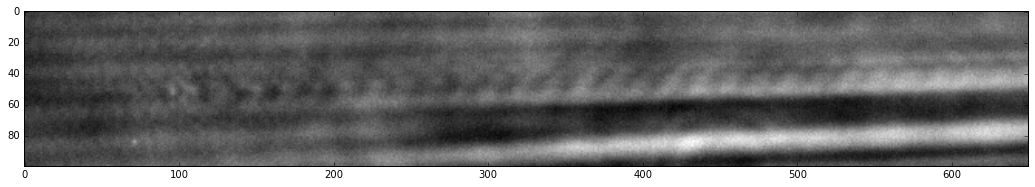

In [125]:
top = 940
bottom = 1040
left = 750
right = 1400

shot.setROI(op.RegionOfInterest(top, bottom, left, right)) # top, bottom, left, right
shot.cropImage(Display=True)

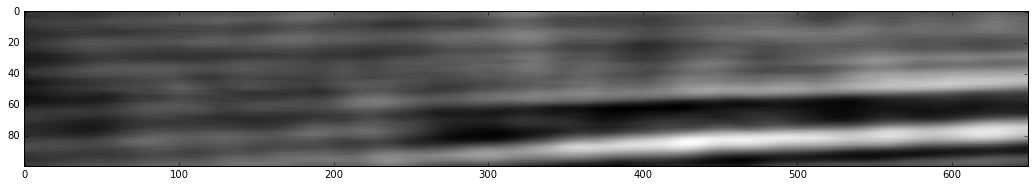

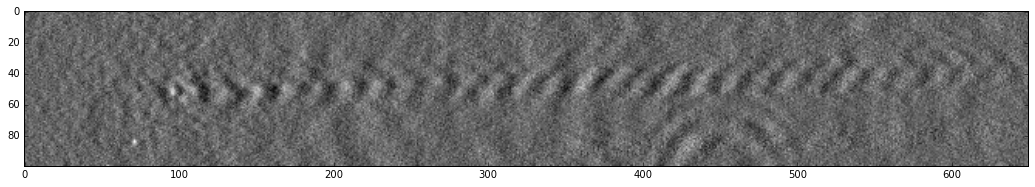

True

In [126]:
# enhance the image by removing the slowly varying background
shot.enhanceImage(Display=True)

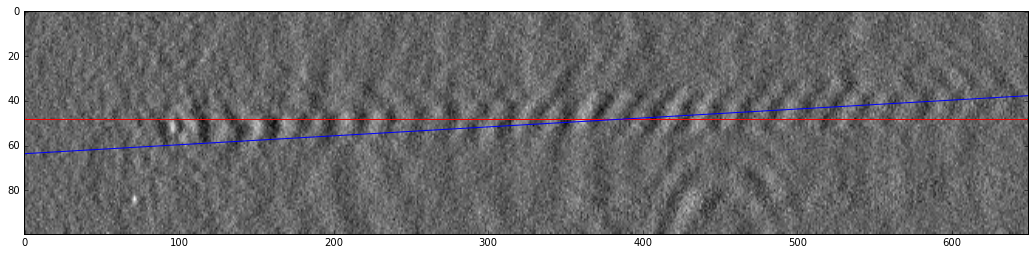

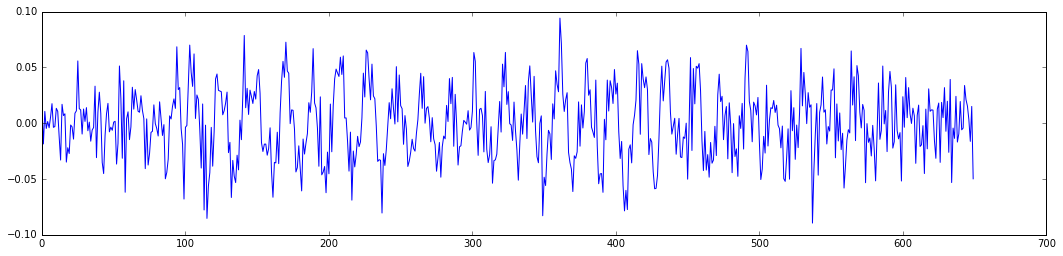

True

In [128]:
lineoutIndex = 48
lineoutMask = [0, 0]
lineoutTilt = -0.04

N = shot.imageOut.shape[1]
fig = plt.figure(figsize=(18, 4))
plt.imshow(shot.imageOut, cmap='gray')
plt.plot(np.ones(N)*lineoutIndex,"-r")
plt.plot( (np.arange(N) - N*0.6)*lineoutTilt + lineoutIndex)
plt.axis('tight')
plt.show()
shot.getLineout(lineoutIndex, lineoutMask, Display=True)

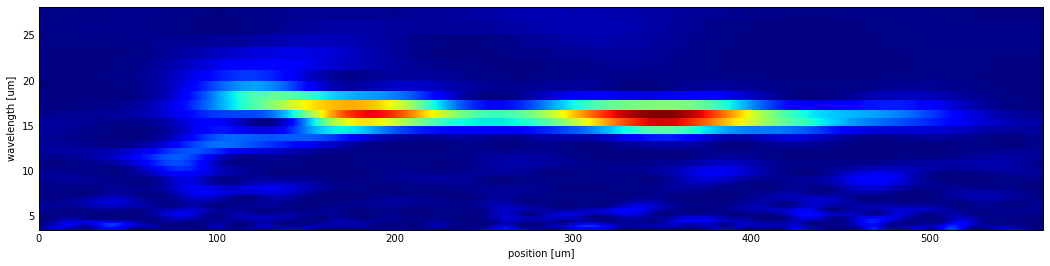

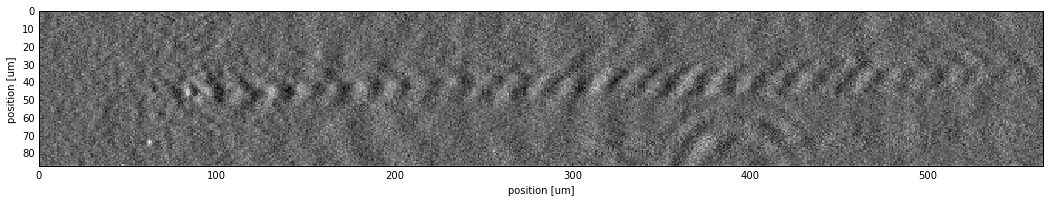

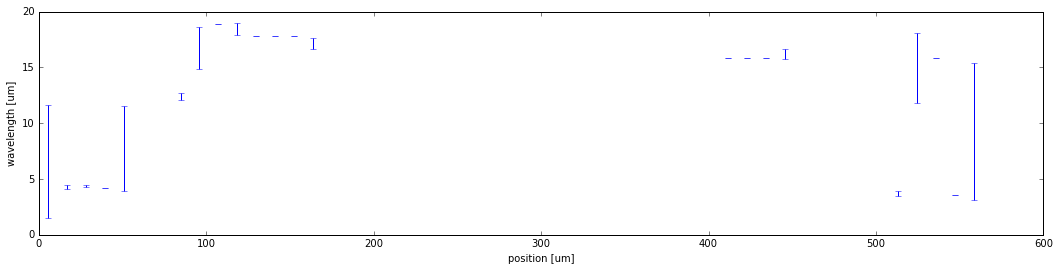

In [129]:
resolution = 0.869 # um/px

shot.setResolution(resolution)
shot.getScalogram()
figSCA = shot.plotScalogram() # return the figure handle 
figOut = shot.plotEnhance()
shot.getWavelength()
figWL = shot.plotWavelength(nbins = 50)

In [130]:
def saveConfig(shot):
    import pickle
    fileName = shot.nameFile("PlasmaWave",".ini",True)
    with open(fileName,'w') as File:
        pickle.dump([path, date, run, shotNo, top, bottom, left, right, lineoutIndex, lineoutMask, resolution], File)        

def loadConfig(FileName):
    import pickle
    with open(FileName) as File:
        a,b,c,d,e,f,g,h,i,j,i = pickle.load(File)
    return a, b, c, d, e, f, g, h, i
        
figOut.savefig(shot.nameFile( "ProbeROI", ".png",True), transparent = True)
figSCA.savefig(shot.nameFile("Scalogram", ".png",True), transparent = True)
figWL.savefig(shot.nameFile("Wavelength", ".png",True), transparent = True)
saveConfig(shot)

myfile = open(shot.nameFile("Wavelength", ".txt", True),"w")
for i in range( len(shot.shift) ):
    myfile.write("%s %s \n" %(shot.shift[i], shot.wavelength[i]))
myfile.close()
    


In [ ]:
from scipy.io import loadmat
data = loadmat("Density.mat")
data = data["Density"][0,0]
temp = data["Nozzle5mm"]
Position = temp['Position'][0,0][0]
Density = temp["Density"][0,0][0]
plt.plot(Position, Density)
plt.show()

def LinWavelength(n):
    return 3.3/np.sqrt(n*1.E-20)
def PositionZ(x1):
    return -6150. - x1
pos = PositionZ(Position[0:180])
lengths = LinWavelength(Density[0:180])
plt.plot(pos,lengths,"-r")

shot.getWavelength()
figWL = shot.plotWavelength(nbins = 50)
#plt.plot(pos,lengths,"-r")
#plt.ylim([10,36])